In [ ]:
import sys
import os
sys.path.append('..')

In [ ]:
from workspace import nometools as nome

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pickle
import scipy
from scipy import stats

In [ ]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'delete/'
tmp_path = data_path + 'tmp/'
steric_path = main_path + 'delete/steric_clash/'

In [353]:
region = 'promoter'

In [354]:
np.random.seed(1234)

In [355]:
from scipy.stats import chi2_contingency
import multiprocessing 

In [356]:
# def getGCHcount_in_window(window, res, pos):
#     '''
#         element in res = ['chr20', 60110, 60111, '+', 0.0, 3]
#     '''
#     start, end = window
#     freq = []
#     meth_c_count = 0
#     net_c_count = 0
#     for itr in range(pos, len(res)):
#         if start > res[itr][1]:
#             ## increase the start of the search such that we start near the window
#             pos += 1
#         elif start <= res[itr][1] and end >= res[itr][1]:
#             freq.append((res[itr][1], res[itr][4], res[itr][5], round(res[itr][4]*res[itr][5]/100)))
#             meth_c_count += round(res[itr][4]*res[itr][5]/100)
#             net_c_count += res[itr][5]
#         elif end < res[itr][1]:
#             ## the rest of sites are away from the window
#             break

#     unmeth_c_count = net_c_count - meth_c_count
#     return meth_c_count, unmeth_c_count, freq, pos

In [357]:
# def findNDR(filtered_res, chr, win_len = 100, multiprocess=False, temp_loc=None):
#     if multiprocess:
#         if temp_loc is None:
#             raise Exception('Input temp loc missing')

#     start = filtered_res[0][1] - 90
#     end = start + win_len
#     step = 20
#     pos_window = 0
#     pos_bg_left = 0
#     pos_bg_right = 0

#     n = (filtered_res[-1][1] - filtered_res[0][1])/step
#     progress_check = int(n/20)

#     print(f'Finding NDR windows for {chr} with window len {win_len}')

#     regions = []
#     itr_count = 0
#     curr_time = time.time()
#     while (start < filtered_res[-1][1]):
#         if itr_count != 0 and itr_count%progress_check == 0:
#             print('progress for {} : {}% and time elapsed {} min'.format(chr, round(itr_count*100/n,2), round((time.time()-curr_time)/60,2)))
        
#         window = (start, end)
#         meth_c_count, unmeth_c_count, freq, pos_window = getGCHcount_in_window(window, filtered_res, pos_window)

#         if not meth_c_count > 0:
#             start += step
#             end += step
#             itr_count += 1
#             continue
        
#         window_bf_left = (start-4000, start)
#         meth_c_count_bg_left, unmeth_c_count_bg_left, freq_bg_left, pos_bg_left = getGCHcount_in_window(window_bf_left, filtered_res, pos_bg_left)
        
#         window_bf_right = (end, end+4000)
#         meth_c_count_bg_right, unmeth_c_count_bg_right, freq_bg_right, pos_bg_right = getGCHcount_in_window(window_bf_right, filtered_res, pos_bg_right)

#         '''
#                     Window(NDR)         background
#             Meth    meth_c_count    meth_c_count_bg
#             Unmeth  unmeth_c_count  unmeth_c_count_bg   
#         '''

#         meth_c_count_bg = meth_c_count_bg_left + meth_c_count_bg_right
#         unmeth_c_count_bg = unmeth_c_count_bg_left + unmeth_c_count_bg_right

#         ## same condition as above -- if condition for bg
#         if not meth_c_count_bg > 0:
#             start += step
#             end += step
#             itr_count += 1
#             continue
        
#         table = np.array([[meth_c_count, meth_c_count_bg],
#                         [unmeth_c_count, unmeth_c_count_bg]])
        
#         chi_test = chi2_contingency(table)

#         if -np.log10(chi_test.pvalue) > 5:
#             assert (start, end) == window
#             window_ = (start, end, -np.log10(chi_test.pvalue))
#             regions.append(window_)
        
#         start += step
#         end += step
#         itr_count += 1

#     print(f'Merging found windows for {chr}')

#     merged_regions = []

#     n = len(regions)
#     progress_check = int(n/10)

#     i = 0
#     curr_time = time.time()
#     while i < n:
#         # if i != 0 and i%progress_check == 0:
#         #     print('progress : {}% and time elapsed {} min'.format(round(i*100/n,2), round((time.time()-curr_time)/60,2)))

#         start, end, pval = regions[i]

#         if i+1 < n:
#             for j in range(i+1, n):
#                 if regions[j][0] <= end:
#                     end = regions[j][1]
#                     pval = min(pval, regions[j][2])
#                 else:
#                     i = j
#                     break
        
#             if j == n-1 and i != j:
#                 i = n

#             merged_regions.append((start, end, pval))
#         else:
#             i += 1
#             assert i == n
#             merged_regions.append((start, end, pval))

#     if multiprocess:
#         file_loc = temp_loc + 'temp.NDR.' + chr + '.bed'
#         with open(file_loc, 'w') as fout:
#             for reg in merged_regions:
#                 temp = [chr, str(reg[0]), str(reg[1]), str(reg[2])]
#                 fout.write('\t'.join(temp) + '\n')
#     else:
#         return merged_regions

In [358]:
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# myprocess= []
# win_len = 200
# for chr in chrs:
#     print(f'Run : {chr}')
#     infile = data_path + 'GCH.filtered.sorted.bed'
#     res = nome.filter_by_chr(infile, chrs=[chr], SILENT=True)
#     print(f'no of reads for {chr} : {len(res)}')
#     print(f'{chr} res check -', len(res), res[0], res[-1])

#     myprocess.append(multiprocessing.Process(target=findNDR, args=(res, chr, win_len, True, data_path, )))
#     myprocess[-1].start()

# for p in myprocess:
#     p.join()

In [359]:
# ndr_regions = []
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# for chr in chrs:
#     fpath = os.path.join(data_path, f'temp.NDR.{chr}.bed')
#     with open(fpath, 'r') as fin:
#         for line in fin:
#             ndr_regions.append(line)

In [360]:
# len(ndr_regions), ndr_regions[0], ndr_regions[-1]

In [361]:
# outfile = data_path + 'NDRp.bed'
# with open(outfile, 'w') as fout:
#     for reg in ndr_regions:
#         fout.write(reg)

In [362]:
# chrs = ['chr' + str(c) for c in range(1, 23)] + ['chrX', 'chrY']
# for chr in chrs:
#     fpath = os.path.join(data_path, f'temp.NDR.{chr}.bed')
#     os.remove(fpath)

In [363]:
# nome.sort_bed(data_path + 'NDRp.bed', data_path + 'NDRp.bed')

In [364]:
### Aboove was the NDR algo

In [365]:
def get_promoters_refGene(infile, outfile):
    seen_coords = set()
    itr = 0
    with open(outfile, 'w') as fout:
        with open(infile, 'r') as fin:
            for line in fin:
                if not line.startswith('#'):
                    line_s = line.strip().split('\t')

                    refid = line_s[1]
                    chrom = line_s[2]
                    strand = line_s[3]
                    txStart = int(line_s[4])
                    txEnd = int(line_s[5])
                    cdsStart = int(line_s[6])
                    cdsEnd = int(line_s[7])
                    geneName = ''.join(c for c in line_s[12] if c.isalnum())

                    coords = chrom + str(txStart) + str(txEnd) + strand
                    if coords not in seen_coords:
                        seen_coords.add(coords)

                        promo_start = 2000
                        promo_end = 1000

                        if strand == "+":
                            promoter_start = txStart - promo_start
                            promoter_end = txStart + promo_end
                        else:
                            promoter_start = txEnd - promo_end
                            promoter_end = txEnd + promo_start
                        
                        if promoter_start < 0:
                                promoter_start = 0

                        if cdsStart != cdsEnd and geneName[0:3] != 'MIR' and geneName[0:3] != 'SNO' and '_' not in chrom:
                            fout.write('\t'.join([str(s) for s in [chrom, promoter_start, promoter_end, refid, geneName, txStart, txEnd, strand]]) + '\n')
                            itr += 1

    print('no of promoters defined :', itr)
    print('promoters saved to {}'.format(outfile))

In [366]:
def get_introns_refGene(infile, outfile, anchor=1, pos='start'):
    seen_coords = set()
    itr = 0
    with open(outfile, 'w') as fout:
        with open(infile, 'r') as fin:
            for line in fin:
                if not line.startswith('#'):
                    line_s = line.strip().split('\t')

                    refid = line_s[1]
                    chrom = line_s[2]
                    strand = line_s[3]
                    txStart = int(line_s[4])
                    txEnd = int(line_s[5])
                    cdsStart = int(line_s[6])
                    cdsEnd = int(line_s[7])
                    geneName = ''.join(c for c in line_s[12] if c.isalnum())

                    coords = chrom + str(txStart) + str(txEnd) + strand
                    if coords not in seen_coords:
                        seen_coords.add(coords)

                        if cdsStart != cdsEnd and geneName[0:3] != 'MIR' and geneName[0:3] != 'SNO' and '_' not in chrom:
                            assert line_s[9].endswith(',')
                            assert line_s[10].endswith(',')

                            exon_starts = np.array(list(map(int, line_s[9][:-1].strip().split(','))))
                            exon_ends = np.array(list(map(int, line_s[10][:-1].strip().split(','))))

                            assert exon_starts.shape == exon_ends.shape

                            intron_starts = exon_ends[:-1].copy()
                            intron_ends = exon_starts[1:].copy()

                            assert np.all((intron_ends - intron_starts) >= 0)

                            for i, (start, end) in enumerate(zip(intron_starts, intron_ends)):
                                if i+1 == anchor:
                                    if end > start:
                                        start_offset = 2000
                                        end_offset = 1000

                                        if pos == 'start':
                                            if strand == "+":
                                                intron_start = start - start_offset
                                                intron_end = start + end_offset
                                            else:
                                                intron_start = end - end_offset
                                                intron_end = end + start_offset
                                        
                                        elif pos == 'end':
                                            if strand == "+":
                                                intron_start = end - start_offset
                                                intron_end = end + end_offset
                                            else:
                                                intron_start = start - end_offset
                                                intron_end = start + start_offset
                                            
                                        if intron_start < 0:
                                                intron_start = 0

                                        # print('\t'.join([str(s) for s in [chrom, intron_start, intron_end, refid, geneName, txStart, txEnd, strand]]) + '\n')
                                        fout.write('\t'.join([str(s) for s in [chrom, intron_start, intron_end, refid, geneName, txStart, txEnd, strand]]) + '\n')
                                        itr += 1

                                    break

    print('no of introns defined :', itr)
    print('introns saved to {}'.format(outfile))

In [369]:
infile = data_path + 'refGene'
outfile = tmp_path + 'refGene.regions.bed'
get_promoters_refGene(infile, outfile) # for promoters
# get_introns_refGene(infile, outfile, anchor=1, pos='start') # for introns

no of promoters defined : 32386
promoters saved to /home/kevin/DNA-Methylation-patterns/delete/tmp/refGene.regions.bed


In [370]:
## nucleotide added here
def filter_bed_files(infile, outfile, min_cov=3):
    chroms_seen = set()
    non_std_chroms = set()
    chroms = ['chr' + str(i) for i in range(1,23)] + ['chrX', 'chrY']

    n = 0
    with open(infile, 'r') as fin:
        n = sum(1 for _ in fin)

    progress_check = int(n/10)
    itr = 0
    with open(outfile, 'w') as fout:
        with open(infile, 'r') as fin:
            print('start traversing bed file ', infile, 'n = ', n)
            curr_time = time.time()
            for line in fin:
                if itr != 0 and itr%progress_check == 0:
                    print('progress : {}% and time elapsed {} min'.format(round(itr*100/n,2), round((time.time()-curr_time)/60,2)))

                itr += 1
                if not line.startswith('track'):
                    line_s = line.strip().split('\t')

                    assert len(line_s) == 11
                    
                    chrom = 'chr' + line_s[0]
                    if chrom in chroms:
                        chroms_seen.add(chrom)

                        start = int(line_s[1])
                        end = int(line_s[2])
                        methyl_rate = float(line_s[3])
                        coverage = int(line_s[4])
                        strand = line_s[5]
                        nt = "G" if strand == "-" else "C"

                        if coverage >= min_cov:
                            fout.write('\t'.join([str(x) for x in [chrom, start, end, strand, methyl_rate, coverage, nt]]) + '\n')
                    else:
                        if chrom not in non_std_chroms:
                            non_std_chroms.add(chrom)

    assert len(chroms_seen) == 24

    print('filered bed file with min coverage {} and saved to {}'.format(min_cov, outfile))
    print('Non standard chrs seen : ', non_std_chroms)

In [371]:
# infile = data_path + 'cpg.raw.sort.GCH.bed'
# outfile = data_path + 'GCH.filtered.bed'

# filter_bed_files(infile, outfile)

In [372]:
# infile = data_path + 'cpg.raw.sort.HCG.bed'
# outfile = data_path + 'HCG.filtered.bed'

# filter_bed_files(infile, outfile)

In [373]:
import subprocess
def sort_bed(infile):
    '''
        sort -k1,1V -k2,2n /loc/GCH.filtered.bed > /loc/sorted.bed
    '''
    res = subprocess.run(['sort', '-k1,1V', '-k2,2n', f'{infile}'], capture_output=True, text=True)

    outfile = infile.replace('.bed', '.sorted.bed')
    if res.returncode == 0:
        with open(outfile, 'w') as fout:
            fout.write(res.stdout)
    else:
        print('error in sorting')

In [374]:
# sort_bed(data_path + 'GCH.filtered.bed')
# sort_bed(data_path + 'HCG.filtered.bed')

In [375]:
sort_bed(tmp_path + 'refGene.regions.bed')

In [376]:
def intersect_bed(file1, file2, outfile):
    '''
        bedtools intersect -a fa -b fb -wa -wb -sorted
    '''
    res = subprocess.run(['bedtools', 'intersect', '-a', f'{file1}', '-b', f'{file2}', '-wa', '-wb', '-sorted'],
                          capture_output=True, text=True)

    if res.returncode == 0:
        with open(outfile, 'w') as fout:
            fout.write(res.stdout)
    else:
        print('error in intersect')

In [377]:
promoters_sorted = tmp_path + 'refGene.regions.sorted.bed'
gch_sorted = data_path + 'GCH.filtered.sorted.bed'
outfile = tmp_path + 'GCH.regions.intersect.bed'

intersect_bed(promoters_sorted, gch_sorted, outfile)

In [378]:
promoters_sorted = tmp_path + 'refGene.regions.sorted.bed'
gch_sorted = data_path + 'HCG.filtered.sorted.bed'
outfile = tmp_path + 'HCG.regions.intersect.bed'

intersect_bed(promoters_sorted, gch_sorted, outfile)

In [379]:
# sizes are different from directly loading the intersect.bed using pandas
# we are loosing some values
def get_methylation(infile, region='region'):
    inter_dict = dict()
    seen_ids = set()

    with open(infile) as f:
        for line in f:
            line_s = line.strip().split('\t')

            chrom = line_s[0]            
            region_start = int(line_s[1])
            region_end = int(line_s[2])
            refid = line_s[3]
            gene_name = line_s[4]
            TSS = int(line_s[5])
            TES = int(line_s[6])
            strand = line_s[7]
            meth_start = int(line_s[9])
            meth_end = int(line_s[10])
            meth_rate = float(line_s[12])
            coverage = int(line_s[13])
            nt = line_s[14]

            dict_id = refid + "-" + str(region_start)
            
            ## We are checking + and -ve strands based on promoter
            if strand == "+":
                intron_abs_pos = meth_start - region_start
            if strand == "-":
                intron_abs_pos = region_end - meth_end
        
            rel_pos = intron_abs_pos - 2000
        
            if dict_id not in seen_ids:
                seen_ids.add(dict_id)
                inter_dict[dict_id] = dict()
            
            inter_dict[dict_id][meth_start] = dict()
            
            inter_dict[dict_id][meth_start]["chrom"] = chrom
            inter_dict[dict_id][meth_start][f"{region}_start"] = region_start
            inter_dict[dict_id][meth_start][f"{region}_end"] = region_end
            inter_dict[dict_id][meth_start]["gene_name"] = gene_name
            inter_dict[dict_id][meth_start]["TSS"] = TSS
            inter_dict[dict_id][meth_start]["TES"] = TES
            inter_dict[dict_id][meth_start]["strand"] = strand
            
            inter_dict[dict_id][meth_start]["meth_start_genome"] = meth_start
            inter_dict[dict_id][meth_start]["meth_end_genome"] = meth_end
            inter_dict[dict_id][meth_start]["meth_pos_abs"] = intron_abs_pos
            inter_dict[dict_id][meth_start]["meth_pos_rel"] = rel_pos
                        
            inter_dict[dict_id][meth_start]["meth_rate"] = meth_rate
            inter_dict[dict_id][meth_start]["coverage"] = coverage
            inter_dict[dict_id][meth_start]["nt"] = nt

    column_names = ['trans_id', 'refid', 'gene_name', 'chrom', f'{region}_start', f'{region}_end', 
                    'TSS', 'TES', 'strand', 'meth_start_genome', 'meth_end_genome', 'meth_pos_abs',
                    'meth_pos_rel', 'meth_rate', 'coverage', 'nt']

    info_dict = dict()
    for col in column_names:
        info_dict[col] = []

    ## Can create a filter for no of GCH or HCG in a promoter
    for dict_id in inter_dict.keys():
        refid = dict_id.split("-")[0]
        for promo_start in inter_dict[dict_id].keys():
            info_dict["trans_id"].append(dict_id)
            info_dict["refid"].append(refid)
            info_dict["gene_name"].append(inter_dict[dict_id][promo_start]["gene_name"])
            info_dict["chrom"].append(inter_dict[dict_id][promo_start]["chrom"])
            info_dict[f"{region}_start"].append(inter_dict[dict_id][promo_start][f"{region}_start"])
            info_dict[f"{region}_end"].append(inter_dict[dict_id][promo_start][f"{region}_end"])
            info_dict["TSS"].append(inter_dict[dict_id][promo_start]["TSS"])
            info_dict["TES"].append(inter_dict[dict_id][promo_start]["TES"])
            info_dict["strand"].append(inter_dict[dict_id][promo_start]["strand"])
            
            info_dict["meth_start_genome"].append(inter_dict[dict_id][promo_start]["meth_start_genome"])
            info_dict["meth_end_genome"].append(inter_dict[dict_id][promo_start]["meth_end_genome"])
            info_dict["meth_pos_abs"].append(inter_dict[dict_id][promo_start]["meth_pos_abs"])
            info_dict["meth_pos_rel"].append(inter_dict[dict_id][promo_start]["meth_pos_rel"])
            
            info_dict["meth_rate"].append(inter_dict[dict_id][promo_start]["meth_rate"])
            info_dict["coverage"].append(inter_dict[dict_id][promo_start]["coverage"])
            info_dict["nt"].append(inter_dict[dict_id][promo_start]["nt"])

    # Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["refid"])), columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]  
        
    df = df.sort_values(by = ['chrom', f'{region}_start'], ascending = [True, True])

    return df

In [380]:
infile = tmp_path + 'GCH.regions.intersect.bed'
df_GCH_intersect = get_methylation(infile, region=region)

In [381]:
df_GCH_intersect.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,meth_start_genome,meth_end_genome,meth_pos_abs,meth_pos_rel,meth_rate,coverage,nt
0,NM_001005277-621034,NM_001005277,OR4F16,chr1,621034,624034,621095,622034,-,622849,622850,1184,-816,33.33,3,G
1,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857344,857345,42,-1958,66.67,3,C
2,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857350,857351,48,-1952,20.00,5,G
3,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857351,857352,49,-1951,66.67,3,C
4,NM_001385640-857302,NM_001385640,SAMD11,chr1,857302,860302,859302,879954,+,857391,857392,89,-1911,50.00,4,G


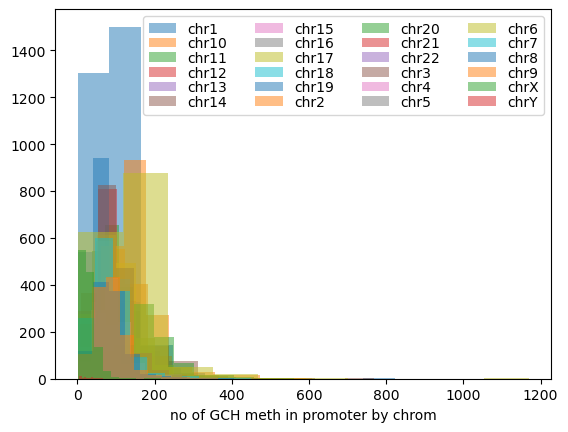

In [382]:
## some random analysis
from collections import defaultdict
chr_groups = df_GCH_intersect.groupby(by='chrom')
methylation_dist = defaultdict(list)
for chr_group in chr_groups:
    region_groups = chr_group[1].groupby(by=[f'{region}_start', f'{region}_end'])
    for region_group in region_groups:
        methylation_dist[chr_group[0]].append(region_group[1].shape[0])

for key in methylation_dist:
    _ = plt.hist(methylation_dist[key], label=key, alpha=0.5)

plt.xlabel(f'no of GCH meth in {region} by chrom')
plt.legend(ncol=4, labelspacing=0.05)
plt.show()

In [383]:
infile = tmp_path + 'HCG.regions.intersect.bed'
df_HCG_intersect = get_methylation(infile, region=region)

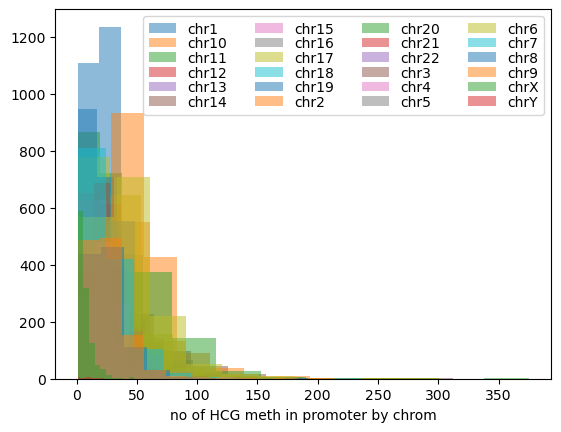

In [384]:
## some random analysis
from collections import defaultdict
chr_groups = df_HCG_intersect.groupby(by='chrom')
methylation_dist = defaultdict(list)
for chr_group in chr_groups:
    region_groups = chr_group[1].groupby(by=[f'{region}_start', f'{region}_end'])
    for region_group in region_groups:
        methylation_dist[chr_group[0]].append(region_group[1].shape[0])

for key in methylation_dist:
    _ = plt.hist(methylation_dist[key], label=key, alpha=0.5)

plt.xlabel(f'no of HCG meth in {region} by chrom')
plt.legend(ncol=4, labelspacing=0.05)
plt.show()

In [385]:
def plot_avg_methylation_levels(df, context, select_genes=[], fig = True, c = 'grey', label = None, rel=False, inter_start=None, inter_end=None):
    
    if len(select_genes) == 0: 
        all_meth_pos_rel = list(df['meth_pos_rel'])
        all_meth_rate = list(df['meth_rate'])
        all_coverage = list(df['coverage'])

        assert len(all_meth_pos_rel) == len(all_meth_rate) == len(all_coverage)

        av_dict = dict()
        seen_pos = set()
        for p in range(len(all_meth_pos_rel)):
            rel_pos_x = all_meth_pos_rel[p]
            meth_rate = all_meth_rate[p]
            coverage = all_coverage[p]
            
            #AVERAGE
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []
            
            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
    else:
        av_dict = {}
        seen_pos = set()
        group = df[df['gene_name'].isin(select_genes)]
        for rel_pos_x, meth_rate, coverage in zip(group['meth_pos_rel'], group['meth_rate'], group['coverage']):
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []

            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
            

    if fig:
        plt.figure(figsize=(15, 7), facecolor='w', edgecolor='k')

    x = []
    y = []

    for rel_pos_x in sorted(av_dict.keys()):
        if rel:
            if rel_pos_x >= inter_start and rel_pos_x <= inter_end:
                if len(av_dict[rel_pos_x]['meth']) >= 100: ## to remove artifact
                    x.append(rel_pos_x)
                    y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))
        else:
            if len(av_dict[rel_pos_x]['meth']) >= 100: ## to remove artifact
                x.append(rel_pos_x)
                y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))

    if label is None:
        plt.plot(x, y, "-", color=c, alpha=1.0)
    else:
        plt.plot(x, y, "-", color=c, label=label, alpha=0.7)
        plt.legend()
        
    plt.xlabel("DNA position [bp]")

    if context == 'GCH':
        ylab = "100-GpC methylation level"
    if context == 'HCG':
        ylab = "CpG methylation level"
    plt.ylabel(ylab)

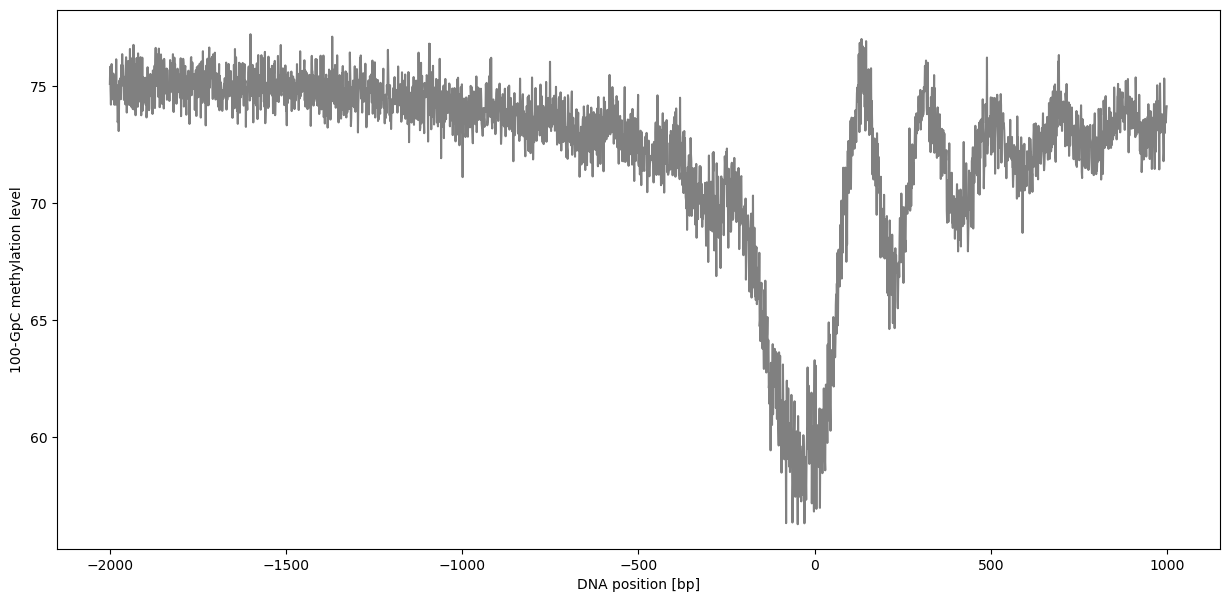

In [386]:
plot_avg_methylation_levels(df_GCH_intersect, 'GCH')

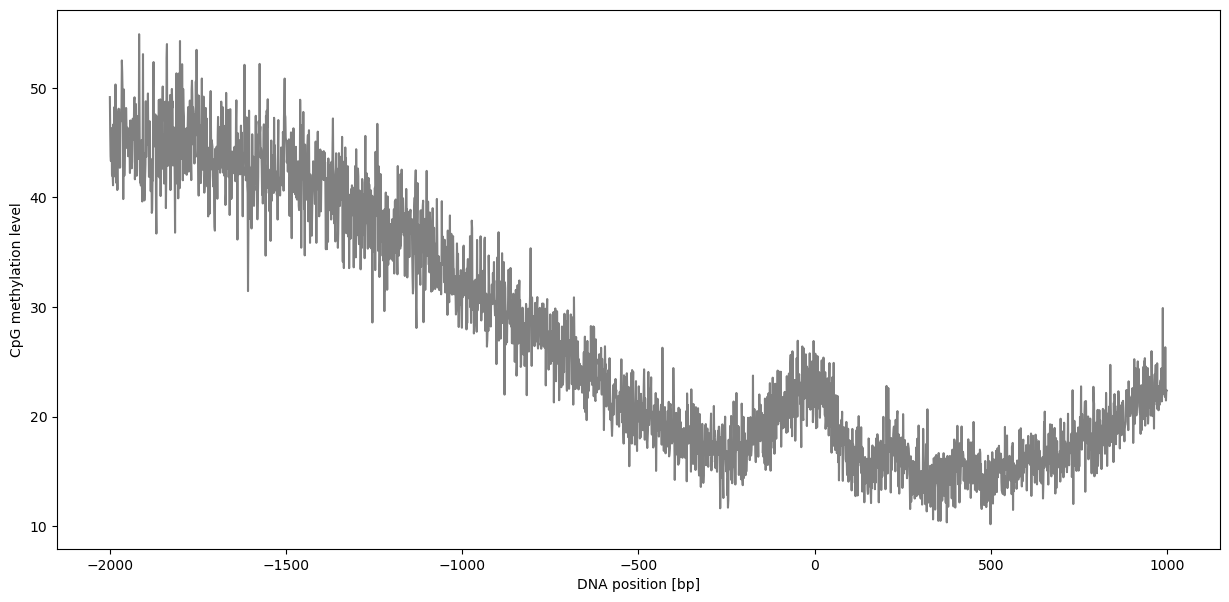

In [387]:
plot_avg_methylation_levels(df_HCG_intersect, 'HCG')

In [388]:
infile = tmp_path + 'HCG.regions.intersect.bed'
cols = ['chrom', 'region_start', 'region_end', 'refid', 'gene_name', 
        'TSS', 'TES', 'strand', 'chrom_', 'meth_start_genome', 'meth_end_genome', 
        'strand_', 'meth_rate', 'coverage', 'nt']
df_HCG_intersect_random = pd.read_csv(infile, sep='\t', names=cols)
df_HCG_intersect_random['meth_rate'] = df_HCG_intersect_random['meth_rate'].sample(frac=1).reset_index(drop=True)
outfile = tmp_path + 'HCG.regions.intersect.random.bed'
df_HCG_intersect_random.to_csv(outfile, sep='\t', header=False, index=False)

In [389]:
infile = tmp_path + 'HCG.regions.intersect.random.bed'
df_HCG_intersect_random = get_methylation(infile, region=region)

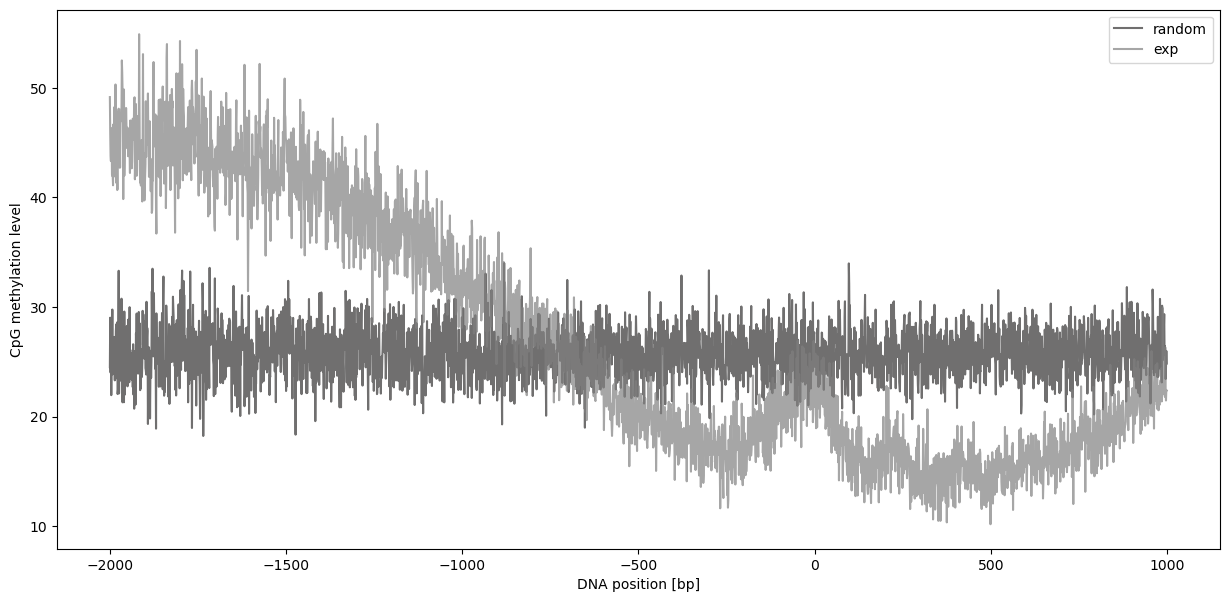

In [390]:
plot_avg_methylation_levels(df_HCG_intersect_random, 'HCG', fig=True, c='#333232', label='random')
plot_avg_methylation_levels(df_HCG_intersect, 'HCG', fig=False, label='exp')

In [391]:
df_HCG_intersect_random.shape, df_HCG_intersect.shape

((876271, 16), (876271, 16))

In [392]:
def plot_CpG_CpG_dist(df, max_dist=20, c='grey'):
    dist_list = []
    chroms = ['chr' + str(i) for i in range(1,23)] + ['chrX', 'chrY']
    for chrom in chroms:
        #### ALL methylated pos
        all_meth_pos = list(df.loc[(df["meth_rate"] != 0) & 
                                   (df["chrom"] == chrom) & 
                                   (df["nt"] == "C")]["meth_start_genome"])
        all_meth_pos_sorted = sorted(list(set(all_meth_pos))) # since mapped to promoter, CpG can be twice if promoter overlap, make set

        for pos in range(len(all_meth_pos_sorted) - 1):
            start = all_meth_pos_sorted[pos]
            next_start = all_meth_pos_sorted[pos+1]
            dist = next_start - start - 1 # is number of bases inbetween
            
            if dist <= max_dist:
                dist_list.append(dist)

    y = []
    for r in range(max_dist+1):
        freq = float(dist_list.count(r))/float(len(dist_list))*100
        y.append(freq)


    plt.figure(facecolor='w', edgecolor='k')

    x = np.arange(len(y))
    plt.bar(x, y, align='center', color=c)

    plt.xlabel("Distance to next 5meC [bp]")
    plt.ylabel("Percentage [%]")
    plt.xlim(1, max_dist+1)
    plt.xticks(x, range(max_dist+1))
    plt.ylim(0, 10)

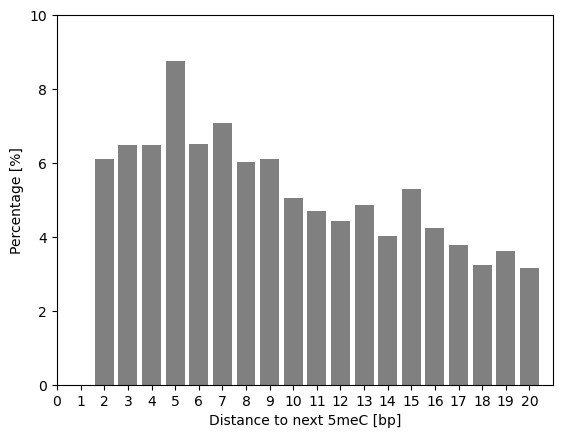

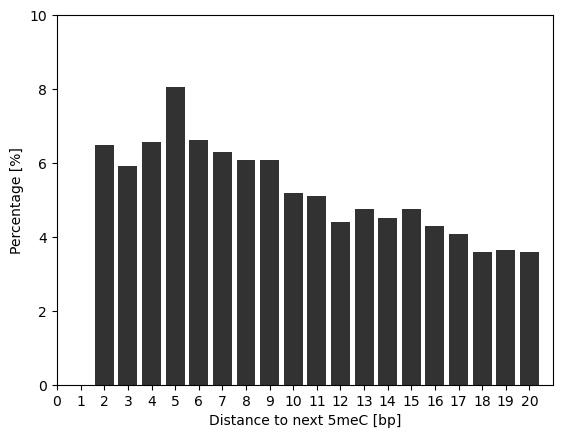

In [393]:
plot_CpG_CpG_dist(df_HCG_intersect)
plot_CpG_CpG_dist(df_HCG_intersect_random, c='#333232')

In [394]:
promoters_sorted = tmp_path + 'refGene.regions.sorted.bed'
ndrfile = data_path + 'NDRp.bed'
outfile = tmp_path + 'NDRp.regions.intersect.bed'
intersect_bed(promoters_sorted, ndrfile, outfile)

In [395]:
def get_nuc_positions(infile, region='region'):
    column_names = ["trans_id", "refid", "gene_name", "chrom", f"{region}_start", f"{region}_end",
                    "TSS", "TES", "strand", "nuc_region_start_genome", "nuc_region_end_genome",
                    "nuc_start_promo_abs", "nuc_end_promo_abs", "nuc_start_promo_rel",
                    "nuc_end_promo_rel", "region_length", "pval"]
    
    info_dict = dict()
    for col in column_names:
        info_dict[col] = []
    
    with open(infile) as fin:
        for line in fin:
            line_s = line.strip().split('\t')

            chrom = line_s[0]            
            region_start = int(line_s[1])
            region_end = int(line_s[2])
            refid = line_s[3]
            gene_name = line_s[4]
            TSS = int(line_s[5])
            TES = int(line_s[6])
            strand = line_s[7]

            nuc_region_start = int(line_s[9])
            nuc_region_end = int(line_s[10])

            nuc_pval = float(line_s[11])
            

            if nuc_region_start >= region_start and nuc_region_end <= region_end:    
                if strand == "+":
                    nuc_abs_start = nuc_region_start - region_start
                    nuc_abs_end = nuc_region_end - region_start
                    
                if strand == "-":
                    nuc_abs_end = region_end - nuc_region_start
                    nuc_abs_start = region_end - nuc_region_end

                rel_start = nuc_abs_start - 2000
                rel_end = nuc_abs_end - 2000

                info_dict["trans_id"].append(refid+'-'+str(region_start))
                info_dict["chrom"].append(chrom)
                info_dict[f"{region}_start"].append(region_start)
                info_dict[f"{region}_end"].append(region_end)
                info_dict["refid"].append(refid)
                info_dict["gene_name"].append(gene_name)
                info_dict["TSS"].append(TSS)
                info_dict["TES"].append(TES)
                info_dict["strand"].append(strand)
                
                info_dict["nuc_region_start_genome"].append(nuc_region_start)
                info_dict["nuc_region_end_genome"].append(nuc_region_end)
                
                info_dict["nuc_start_promo_abs"].append(nuc_abs_start)
                info_dict["nuc_end_promo_abs"].append(nuc_abs_end)
                
                info_dict["nuc_start_promo_rel"].append(rel_start)
                info_dict["nuc_end_promo_rel"].append(rel_end)
                
                info_dict["region_length"].append(rel_end - rel_start)

                info_dict["pval"].append(nuc_pval)
            
            else:
                # print('please check intersection file')
                pass

            
    # Built dataframe
    df = pd.DataFrame(0, index = np.arange(len(info_dict["refid"])), columns = column_names)
    for feat in column_names:
        df[feat] = info_dict[feat]  
        
    df = df.sort_values(by = ['chrom', f'{region}_start'], ascending=[True, True])
      
    return df

In [396]:
infile = tmp_path + 'NDRp.regions.intersect.bed'
df_NDR_pos = get_nuc_positions(infile, region)

In [397]:
df_NDR_pos.head()

,trans_id,refid,gene_name,chrom,promoter_start,promoter_end,TSS,TES,strand,nuc_region_start_genome,nuc_region_end_genome,nuc_start_promo_abs,nuc_end_promo_abs,nuc_start_promo_rel,nuc_end_promo_rel,region_length,pval
0,NM_198317-893963,NM_198317,KLHL17,chr1,893963,896963,895963,901099,+,896516,896916,2553,2953,553,953,400,8.082617
1,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,954676,955036,1177,1537,-823,-463,360,7.096998
2,NM_198576-953499,NM_198576,AGRN,chr1,953499,956499,955499,991494,+,955736,956036,2237,2537,237,537,300,5.599118
3,NM_001363525-1050469,NM_001363525,C1orf159,chr1,1050469,1053469,1017202,1051469,-,1051496,1051936,1533,1973,-467,-27,440,5.048233
4,NM_152228-1264659,NM_152228,TAS1R3,chr1,1264659,1267659,1266659,1270694,+,1265076,1265356,417,697,-1583,-1303,280,5.099232


In [398]:
df_NDR_pos['trans_id'].unique().shape

(9774,)

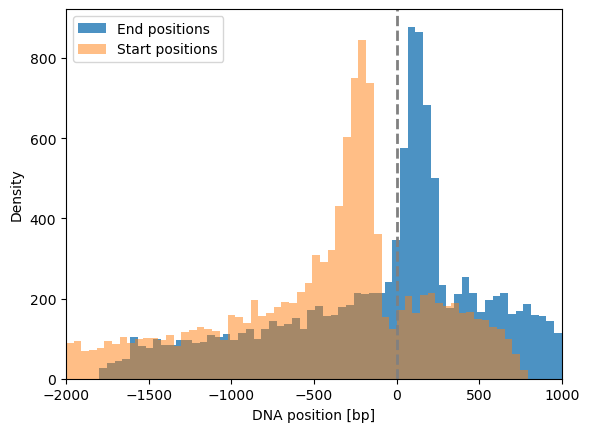

In [399]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure()

plt.hist(df_NDR_pos['nuc_end_promo_rel'],  bins = 60, histtype='bar', density=False, label="End positions", alpha = 0.8)  
plt.hist(df_NDR_pos['nuc_start_promo_rel'], bins = 60, histtype='bar', density=False, label="Start positions", alpha = 0.5)   

plt.xlabel("DNA position [bp]")
plt.ylabel("Density")

plt.xlim(-2000,1000)
plt.axvline(x=0, linestyle='dashed', linewidth=2, color='grey')
plt.legend()
plt.show()

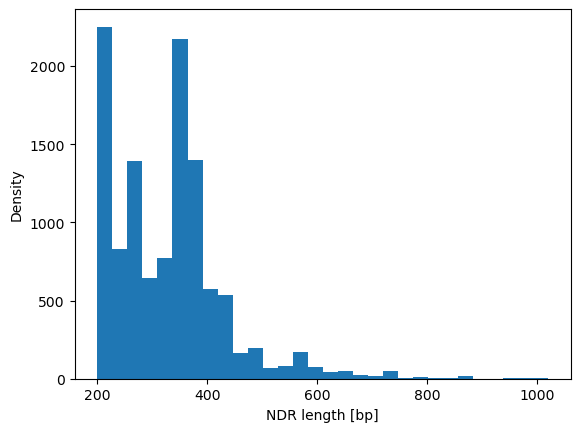

In [400]:
plt.figure()

plt.hist(df_NDR_pos['region_length'], bins=30, histtype='bar', density=False)  

plt.xlabel("NDR length [bp]")
plt.ylabel("Density")
plt.show()

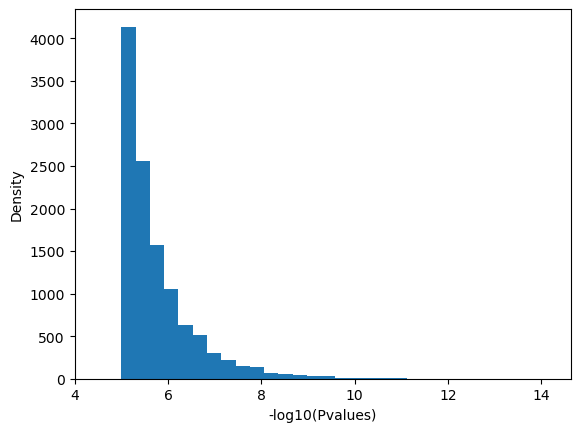

In [401]:
plt.figure()

plt.hist(df_NDR_pos['pval'], bins=30, histtype='bar', density=False)  

plt.xlabel("-log10(Pvalues)")
plt.xlim(4,)
plt.ylabel("Density")
plt.show()

Text(0, 0.5, 'pvalue')

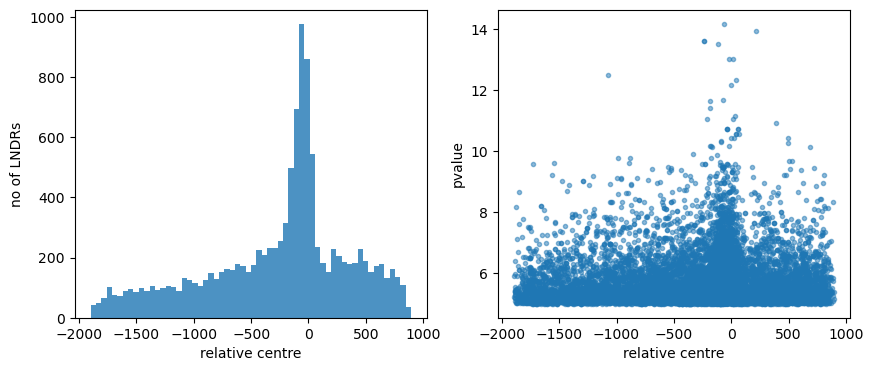

In [402]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ax[0].hist((df_NDR_pos['nuc_start_promo_rel']+df_NDR_pos['nuc_end_promo_rel'])/2, 
           bins=60, histtype='bar', density=False, alpha=0.8)  

ax[0].set_xlabel("relative centre")
ax[0].set_ylabel("no of LNDRs")

ax[1].scatter((df_NDR_pos['nuc_start_promo_rel']+df_NDR_pos['nuc_end_promo_rel'])/2, 
            df_NDR_pos['pval'], marker='.', alpha=0.5)
ax[1].set_xlabel('relative centre')
ax[1].set_ylabel('pvalue')

In [ ]:
plt.scatter(df_NDR_pos['region_length'], df_NDR_pos['pval'])